In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

**Data** Mining

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Neha Singh/lung_cancer_examples.csv")

In [ ]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
df.columns = ['Name', 'Surname', 'Age', 'Smokes', 'AirQ', 'Alcohol', 'Result']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AirQ     59 non-null     int64 
 5   Alcohol  59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [ ]:
df.Result.value_counts()

0    31
1    28
Name: Result, dtype: int64

Data Cleaning

In [ ]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AirQ       0
Alcohol    0
Result     0
dtype: int64

Data Exploration

In [ ]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
  sns.pairplot(df, hue="Result", height=height, aspect=aspect)

In [ ]:
interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

We can understand from this plot that:


1.   Alcohol is more promiment than smoking
2.   More people with higher age has great impact
3.   Air Quality has a linear relation with all other factors.



Feature Engineering

5.203389830508475
5.0
0    5
dtype: int64


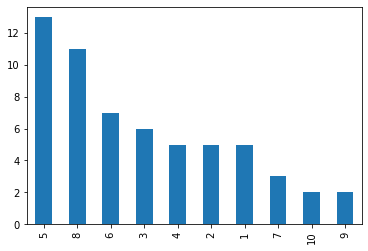

In [ ]:
print(df['AirQ'].mean())
print(df['AirQ'].median())
print(df['AirQ'].mode())

df.AirQ.value_counts().plot(kind='bar')
plt.show()

15.067796610169491
15.0
0    20
dtype: int64


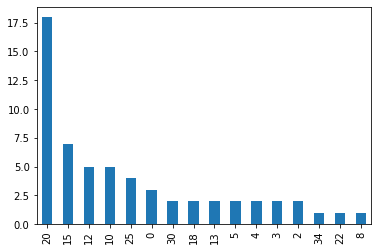

In [ ]:
print(df['Smokes'].mean())
print(df['Smokes'].median())
print(df['Smokes'].mode())

df.Smokes.value_counts().plot(kind='bar')
plt.show()

42.6271186440678
39.0
0    62
dtype: int64


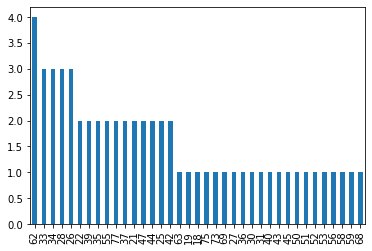

In [ ]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

df.Age.value_counts().plot(kind='bar')
plt.show()

3.23728813559322
3.0
0    2
dtype: int64


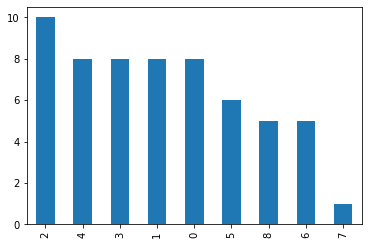

In [ ]:
print(df['Alcohol'].mean())
print(df['Alcohol'].median())
print(df['Alcohol'].mode())

df.Alcohol.value_counts().plot(kind='bar')
plt.show()

From the above vizualization, we can fin out:


1.   There are no outliers
2.   Data is correct according to domain knowledge



Predictive Modeling

We will divide our dataset into train, and test in 30:70 ratio, and then feed to our model.

In [ ]:
Y = df["Result"]

In [ ]:
del df["Result"]
del df["Name"]
del df["Surname"]

In [ ]:
X = df
X.head()

,Age,Smokes,AirQ,Alcohol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [ ]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

Splitting Data into Training, and Testing Dataset.



In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.shape, X_train.shape, X_test.shape, Y_test.shape)

(59, 4) (53, 4) (6, 4) (6,)


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)
prediction_lr = model_lr.predict(X_test)
#prediction_lr

mean_squared_error(prediction_lr, Y_test)

0.0

In [ ]:
score = model_lr.score(X_test, Y_test)
score

1.0

SVM 

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_test, Y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predict_svm = clf.predict(X_test)
predict_svm

array([1, 1, 0, 1, 1, 0])

In [ ]:
mean_squared_error(prediction_lr, Y_test)

0.0

In [ ]:
score = model_lr.score(X_test, Y_test)
score

1.0